# Unemployment Analysis In India in Covide-19

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Problem Statement
- Analyze unemployment rate data representing unemployed people percentage. 
- Use Python for data cleaning, exploration, and visualization of unemployment trends. 
- Investigate the impact of Covid-19 on unemployment rates. 
- Identify key patterns or seasonal trends in the data. 
- Present insights that could inform economic or social policies.

## Data Cleaning

In [7]:
df.columns = df.columns.str.strip()
print('Removed leading and trailing spaces in colum names')

Removed leading and trailing spaces in colum names


In [8]:

df.dropna(inplace=True)
print('Droped null rows at the bottom of data set')

Droped null rows at the bottom of data set


In [9]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print('converted data type of Date colum from object to Date')

converted data type of Date colum from object to Date


C:\Users\Ghulam Mustafa\AppData\Local\Temp\ipykernel_8460\2777102850.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [10]:
df.fillna(method='Bfill',inplace=True)
print('filled null values')

filled null values


C:\Users\Ghulam Mustafa\AppData\Local\Temp\ipykernel_8460\3617049834.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='Bfill',inplace=True)


In [11]:

df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
print('Extracted Month and Year from Date column ')

Extracted Month and Year from Date column 


In [12]:
df['Month']=df['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','March','April','May','Jun','July','Augst','Sept','Oct','Nov','Dec'])
print('Coverted Numeric values of Month into Month Name')


Coverted Numeric values of Month into Month Name


# Data Analysis

## Unemployment Rate Before Covid And During Covid

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

pre_covid = df[df['Date'] < '2020-03-01']
covid = df[df['Date'] >= '2020-03-01']

pre_covid_mean = pre_covid['Estimated Unemployment Rate (%)'].mean()
covid_mean = covid['Estimated Unemployment Rate (%)'].mean()
print(pre_covid_mean,'\n',covid_mean)

9.509533582089553 
 17.774362745098042


In [14]:
increase_percentage = ((covid_mean - pre_covid_mean) / pre_covid_mean) * 100
increase_percentage


np.float64(86.91098350580133)

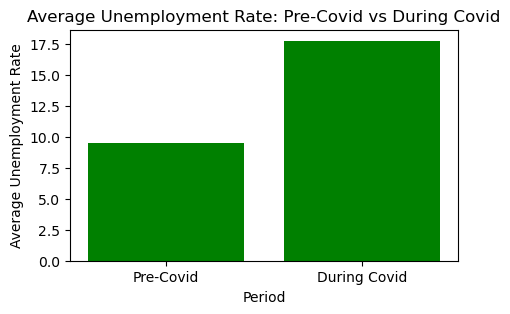

In [15]:
labels = ['Pre-Covid', 'During Covid']
values = [pre_covid_mean, covid_mean]

# Create bar chart
plt.figure(figsize=(5,3))
plt.bar(labels, values,color='green')
plt.xlabel('Period')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate: Pre-Covid vs During Covid')
plt.show()

# Add value labels on bars

### Un Employment Trend on Monthly Base

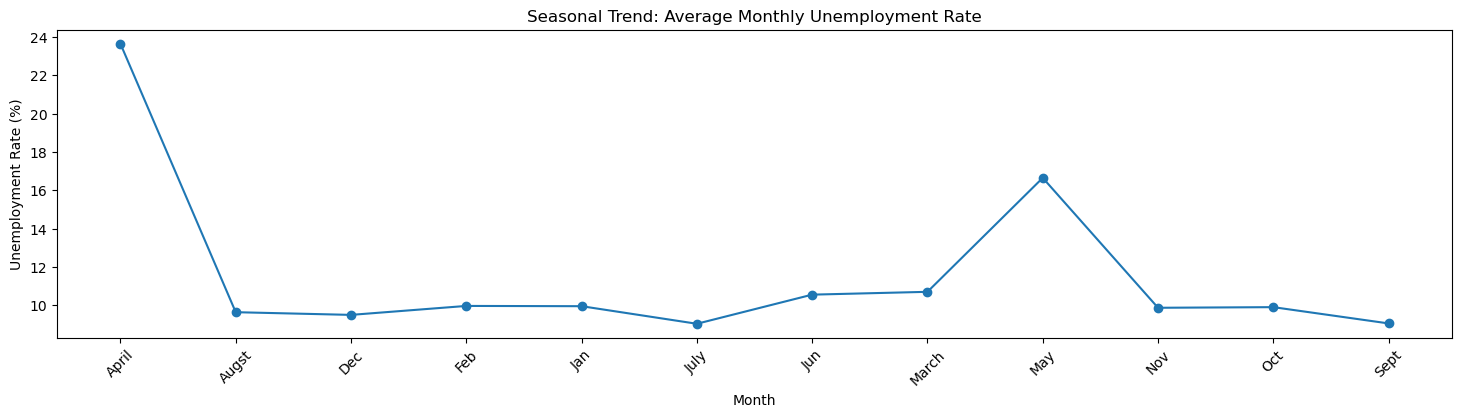

In [16]:
x=df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(18,4))
plt.plot(x.index, x.values, marker='o')
plt.title("Seasonal Trend: Average Monthly Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()


##  Unemployement Rate with respect to time on covide

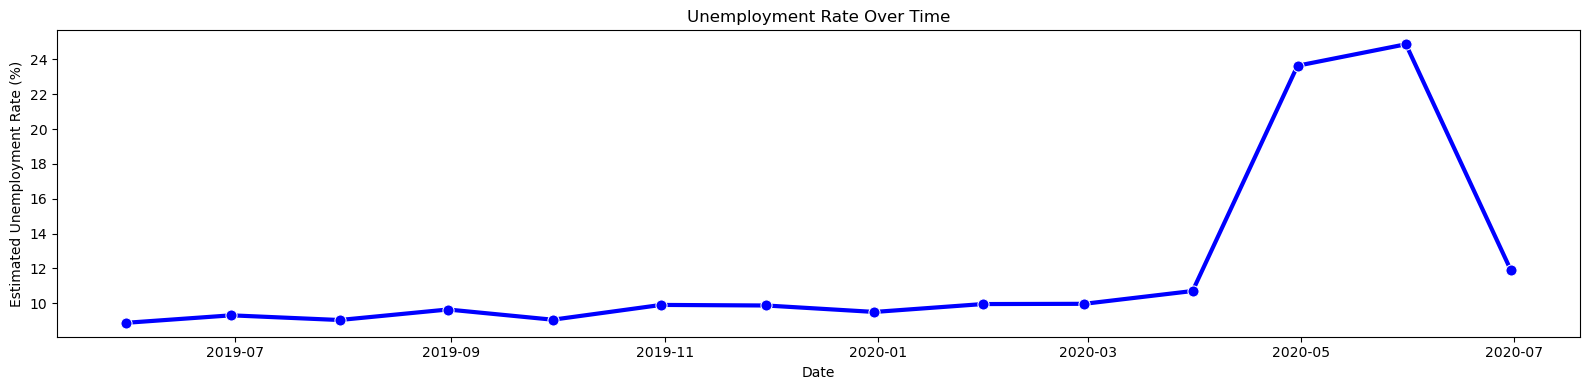

In [17]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df,x='Date',y='Estimated Unemployment Rate (%)',errorbar=None,color='Blue',marker='o',markersize=8,linewidth=3)
plt.title('Unemployment Rate Over Time')
plt.tight_layout()
plt.show()

## Unemployment Rate on the basis of Area like Rural Employees and Urban Employees before and during covid

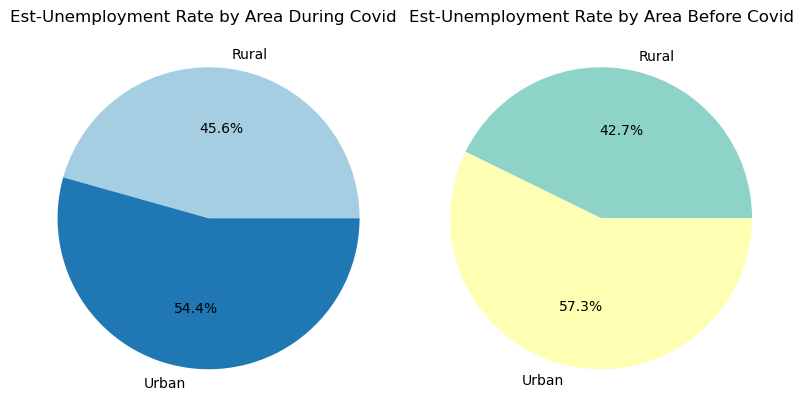

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5)) 
# Pie chart 1: During Covid
Area = covid.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
axes[0].pie(Area, labels=Area.index, autopct='%0.1f%%', colors=plt.cm.Paired.colors)
axes[0].set_title('Est-Unemployment Rate by Area During Covid  ')

# Pie chart 2: Pre-Covid
Are = pre_covid.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
axes[1].pie(Are, labels=Are.index, autopct='%0.1f%%', colors=plt.cm.Set3.colors)
axes[1].set_title('Est-Unemployment Rate by Area Before Covid')

plt.tight_layout()
plt.show()


## Unemployment Rate With Respect to Region in covid time befor covid And After Covid

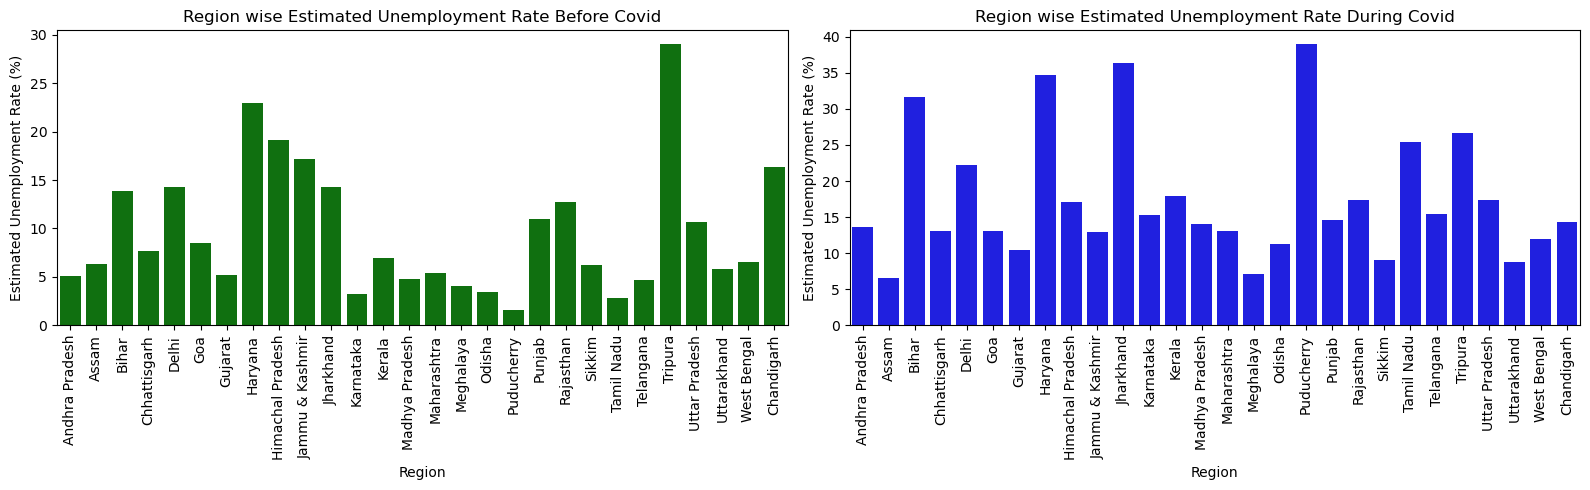

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5)) 
# Plot 1: Pre-Covid
sns.barplot(data=pre_covid, x='Region', y='Estimated Unemployment Rate (%)',errorbar=None, color='green', ax=axes[0])
axes[0].set_title('Region wise Estimated Unemployment Rate Before Covid')
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: During Covid
sns.barplot(data=covid, x='Region', y='Estimated Unemployment Rate (%)',errorbar=None, color='bl', ax=axes[1])
axes[1].set_title('Region wise Estimated Unemployment Rate During Covid')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


## Mean Employed peopes in different Areasof  different Regions During covid

In [56]:
Estimated_emp=pd.pivot_table(covid, values='Estimated Unemployment Rate (%)', index='Area', columns='Region', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
Estimated_emp

Region,Andhra Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Area,,,,,,,,,,,,,,,,,,,,,
Rural,8.9150,4.383333,32.0575,NaN,6.2725,19.9425,17.955,8.8950,33.830,11.6500,...,38.4100,18.6975,11.5075,2.905,25.0850,15.8625,27.200,13.6725,5.9800,12.1775
Urban,18.2375,8.225000,31.2050,14.325,19.8775,24.3725,8.260,11.8725,35.475,22.4875,...,39.2275,10.5475,23.1150,12.150,25.7225,15.0225,26.205,21.0925,10.9425,11.8450


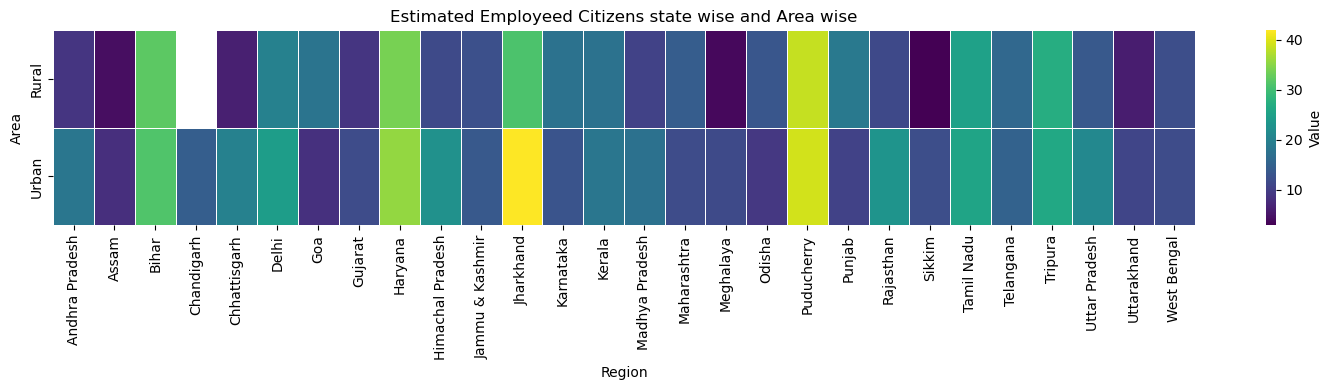

In [57]:
plt.figure(figsize=(15,4))
sns.heatmap(Estimated_emp,cmap="viridis", linewidths=0.5, linecolor="white",  fmt=".1f", cbar_kws={'label': 'Value'})
plt.title('Estimated Employeed Citizens state wise and Area wise')
plt.tight_layout()
plt.show()


## Unemployment Rate in different Areas of Different Regions Before covid

In [58]:
Estimated_unemp=pd.pivot_table(pre_covid, values='Estimated Unemployment Rate (%)', index='Area', columns='Region', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
Estimated_unemp


Region,Andhra Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Area,,,,,,,,,,,,,,,,,,,,,
Rural,4.171,4.526667,10.655,NaN,6.771,13.385,6.477,4.726,21.486,17.046,...,1.034,9.216,10.695,6.530,2.252,4.664,27.153,8.823,4.553,5.73
Urban,5.904,8.034000,17.011,16.325,8.642,15.076,10.538,5.626,24.385,21.212,...,2.152,12.773,14.819,6.155,3.421,4.648,30.866,12.415,7.050,7.41


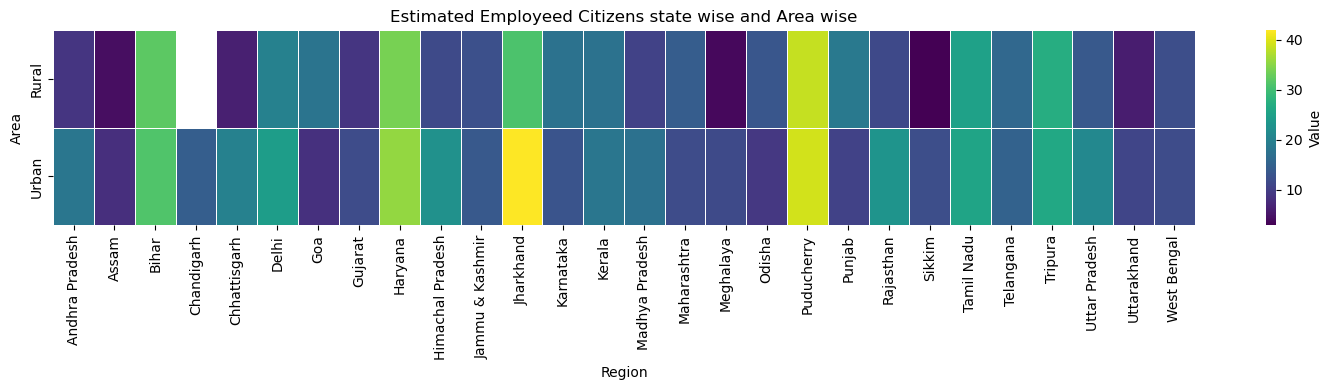

In [59]:
plt.figure(figsize=(15,4))
sns.heatmap(Estimated_emp,cmap="viridis", linewidths=0.5, linecolor="white",  fmt=".1f", cbar_kws={'label': 'Value'})
plt.title('Estimated Employeed Citizens state wise and Area wise')
plt.tight_layout()
plt.show()


# Conclusion
- Before covide the estimated unemployment rate was 9.5 but during covid it increased 86.9% and became 17.9
- In April month the Unemployment rate was at peak which was 24
- Harayana and Tripura are the stats having highest Unemployment rate
- During covid the unemployment Rate Decreased 3 percent while in Rural areas it increased by 3 percent
- Befor covid Tripura state had highest Unemployment Rate
- During covid Jharkhand and Puducherry had highest Unemployment Rate
- West Bengal Was the state which was not impacted by Covid In case of unemployment